In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\train_data.csv")
df_test = pd.read_csv(r"C:\Users\hp\Downloads\test_data.csv")
sample_solution = pd.read_csv(r"C:\Users\hp\Downloads\sample_solution.csv")
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


Ma'lumotlar hammasida to'liq

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

In [4]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


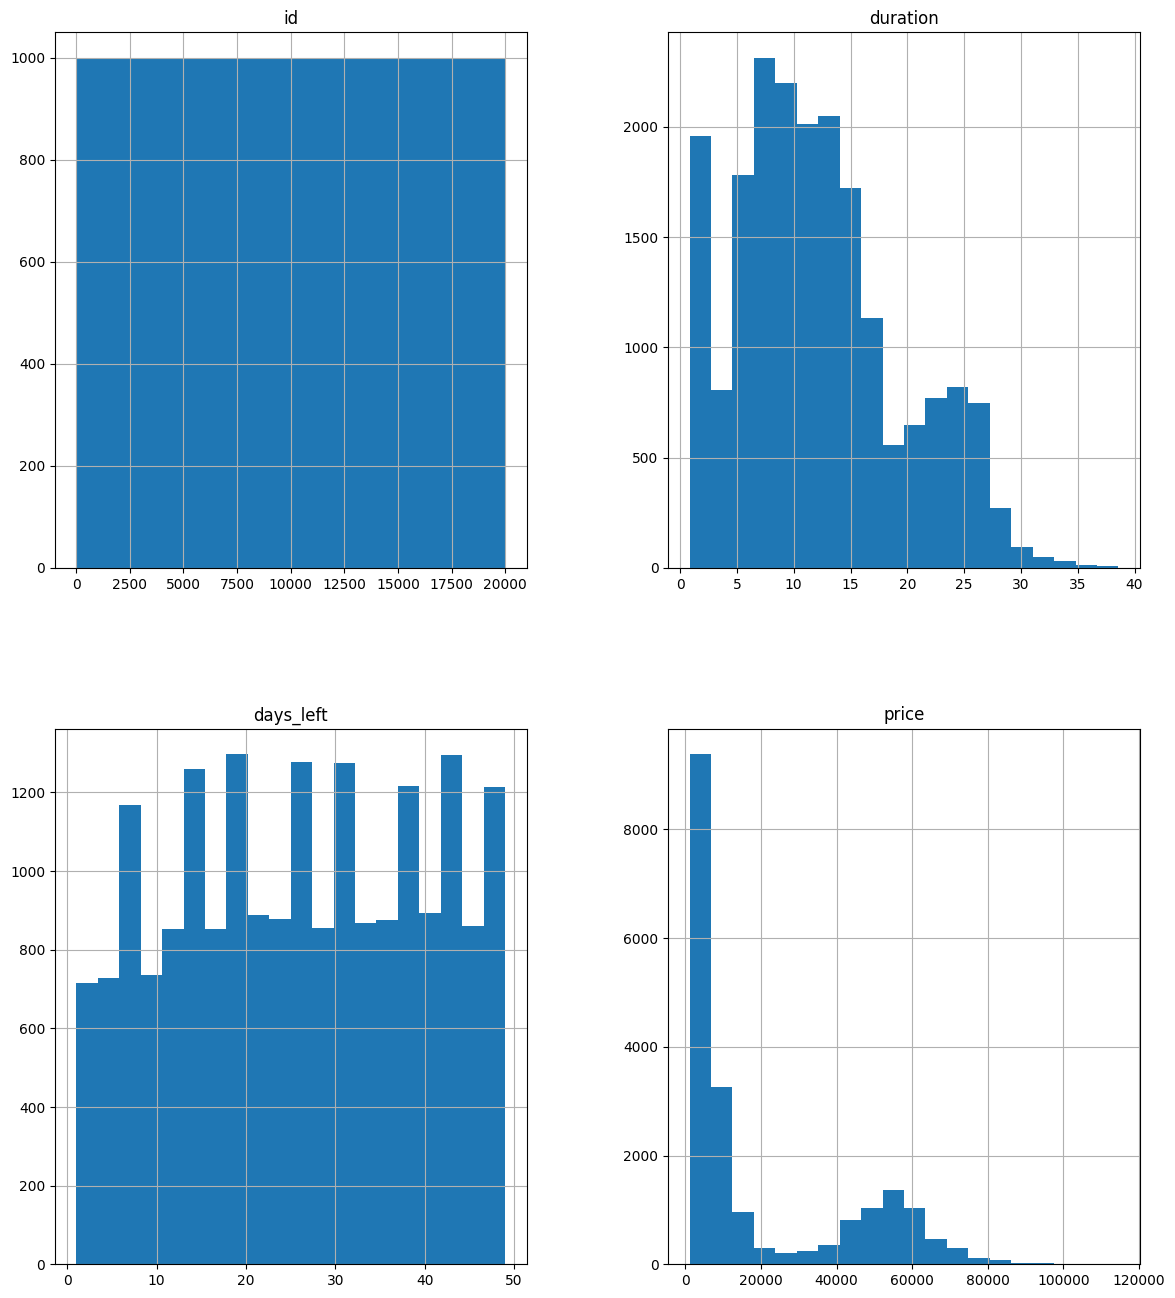

In [5]:
df.hist(bins=20 , figsize = (14 , 16))
plt.show()

In [6]:
df.isna().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df['arrival_time'].value_counts()

arrival_time
Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: count, dtype: int64

In [8]:
stops = {'one' : 1 , 'zero' : 0 , 'two_or_more':2}
classes = {'Economy':0 , 'Business':1}
df['stops'] = df['stops'].replace(stops)
df['class'] = df['class'].replace(classes)
departure_time  = {'Early_Morning':1 , 'Morning':2 ,'Afternoon':3,'Evening':4 ,'Night':5 , 'Late_Night':6}
df['departure_time'] = df['departure_time'].replace(departure_time)
arrival_time = {'Early_Morning':5 , 'Morning':3 ,'Afternoon':4 ,'Evening':2,'Night':1 , 'Late_Night':6}
df['arrival_time'] = df['arrival_time'].replace(arrival_time)

In [9]:
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,1,1,Mumbai,0,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,4,0,1,Kolkata,0,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,2,1,2,Delhi,1,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,2,1,2,Hyderabad,0,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,0,3,Mumbai,0,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,1,5,Mumbai,0,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,2,1,4,Delhi,0,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,2,2,Bangalore,0,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,4,1,3,Bangalore,0,16.33,21,6450


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  int64  
 5   stops             20000 non-null  int64  
 6   arrival_time      20000 non-null  int64  
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  int64  
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.8+ MB


In [11]:
df.select_dtypes(['object']).columns

Index(['airline', 'flight', 'source_city', 'destination_city'], dtype='object')

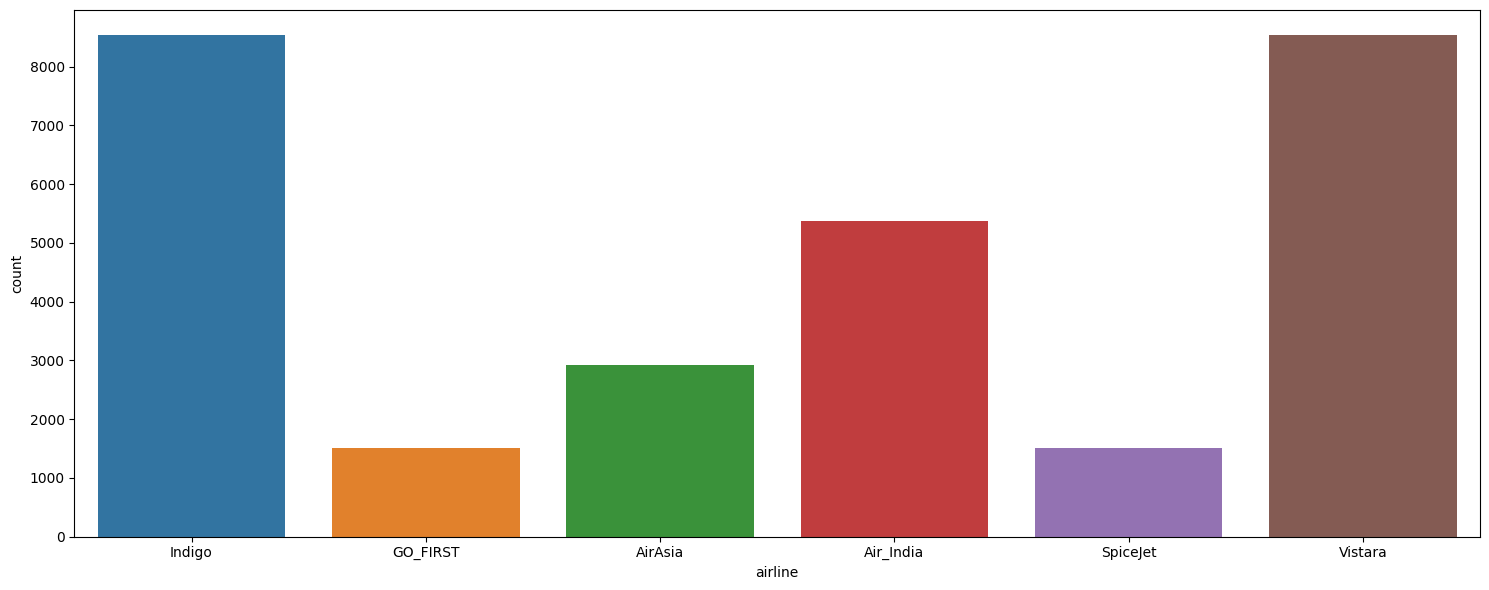

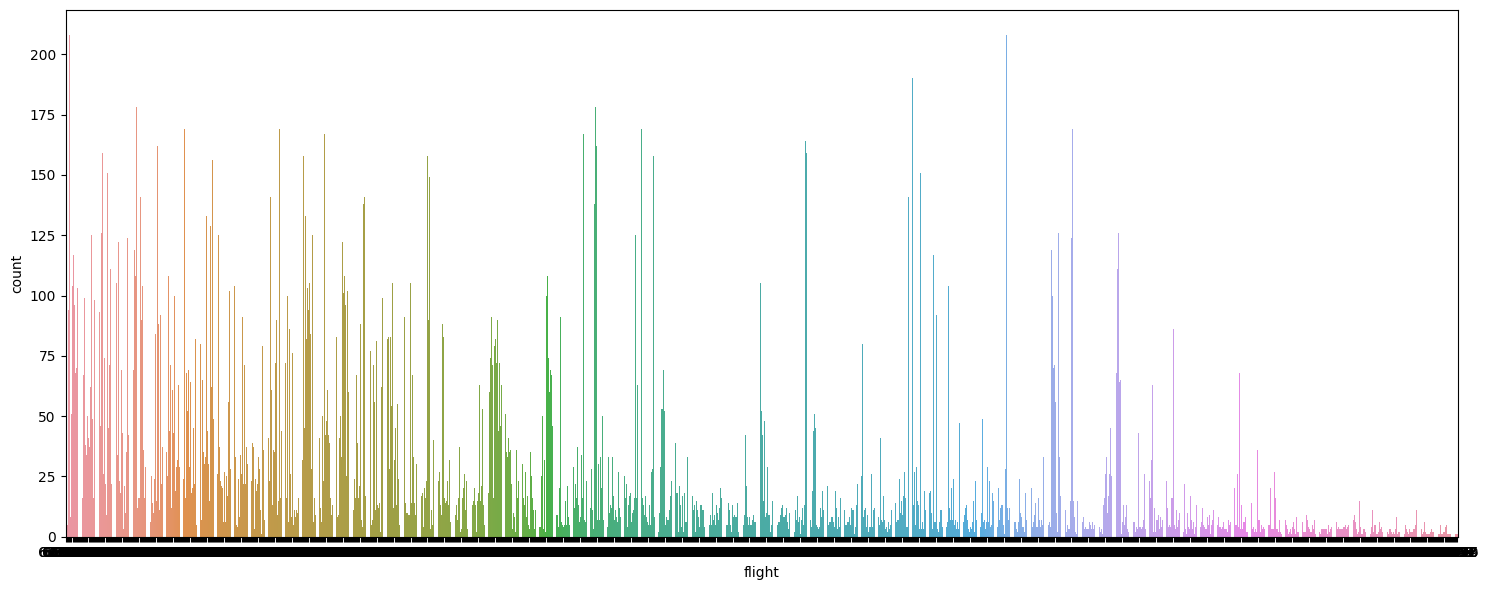

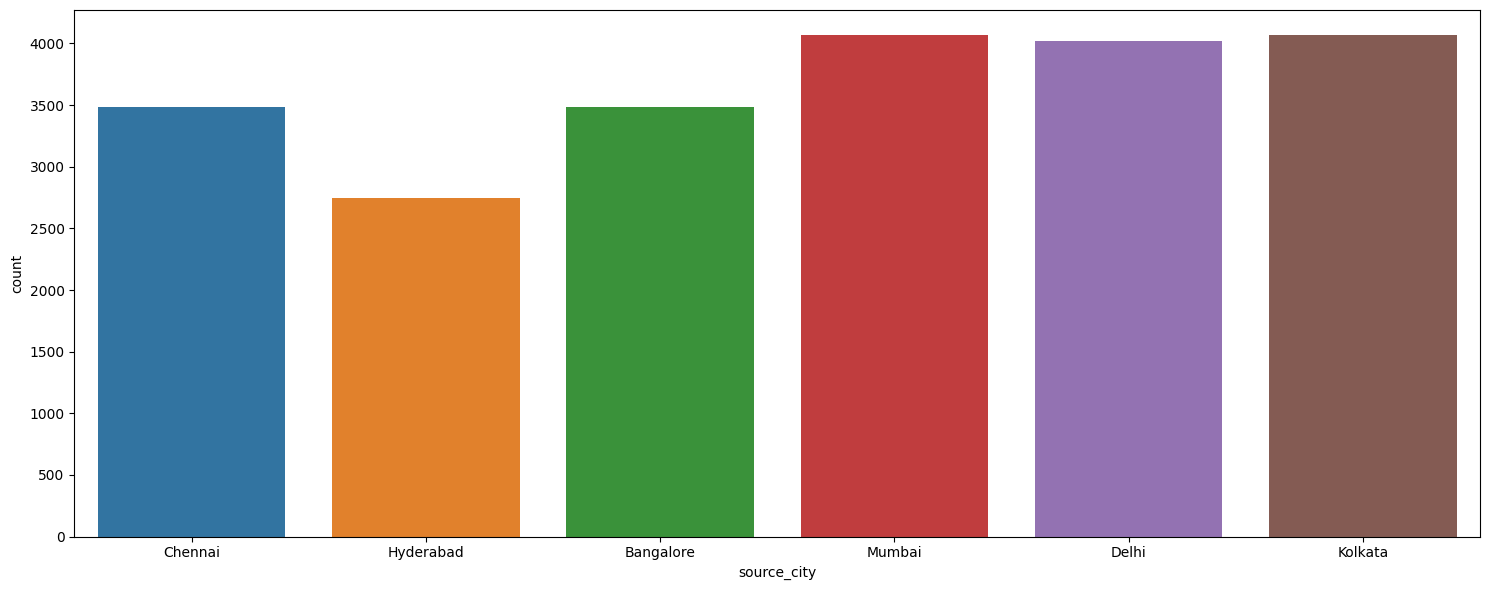

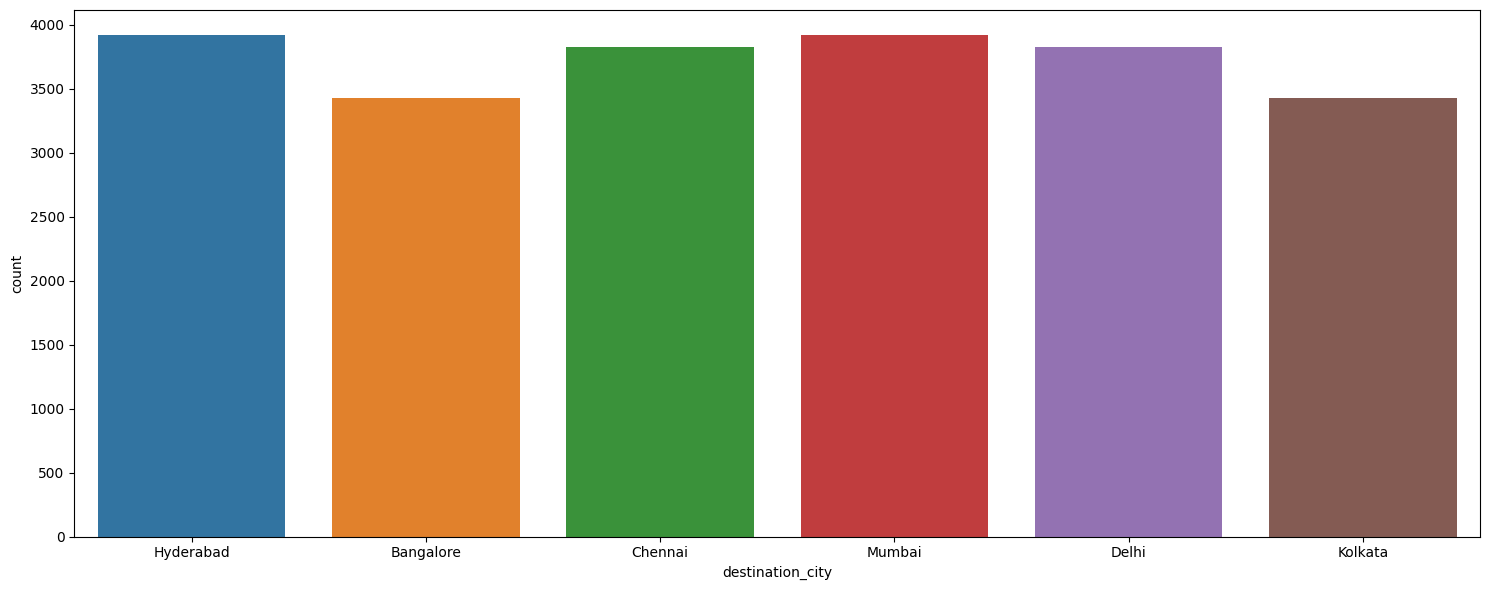

In [12]:
for i in ['airline', 'flight', 'source_city', 'destination_city']:
    plt.figure(figsize=(15,6))
    sns.countplot(data = df , x = i)
    ax = sns.countplot(x=i ,data = df.sort_values('price',ascending = True))
    plt.tight_layout()
    plt.show()
    print("\n\n")

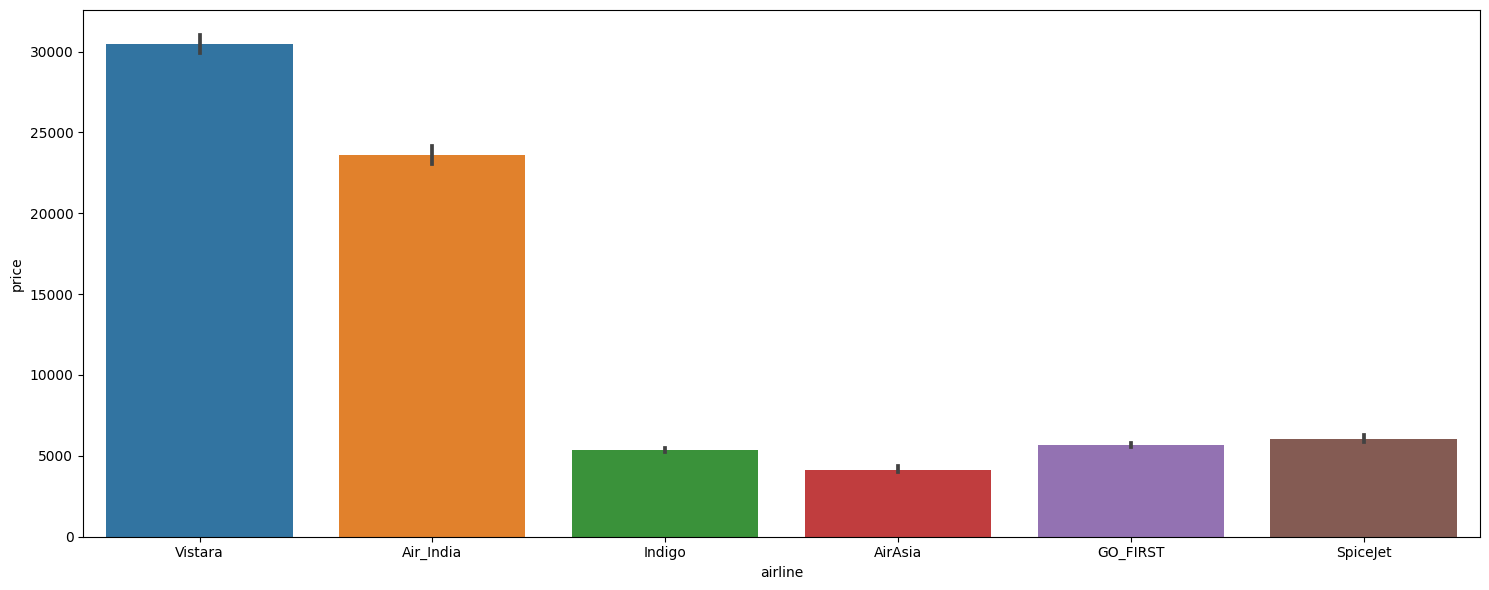

In [13]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x='airline',y='price',data = df.sort_values('price' , ascending = False))
plt.tight_layout()
plt.show()

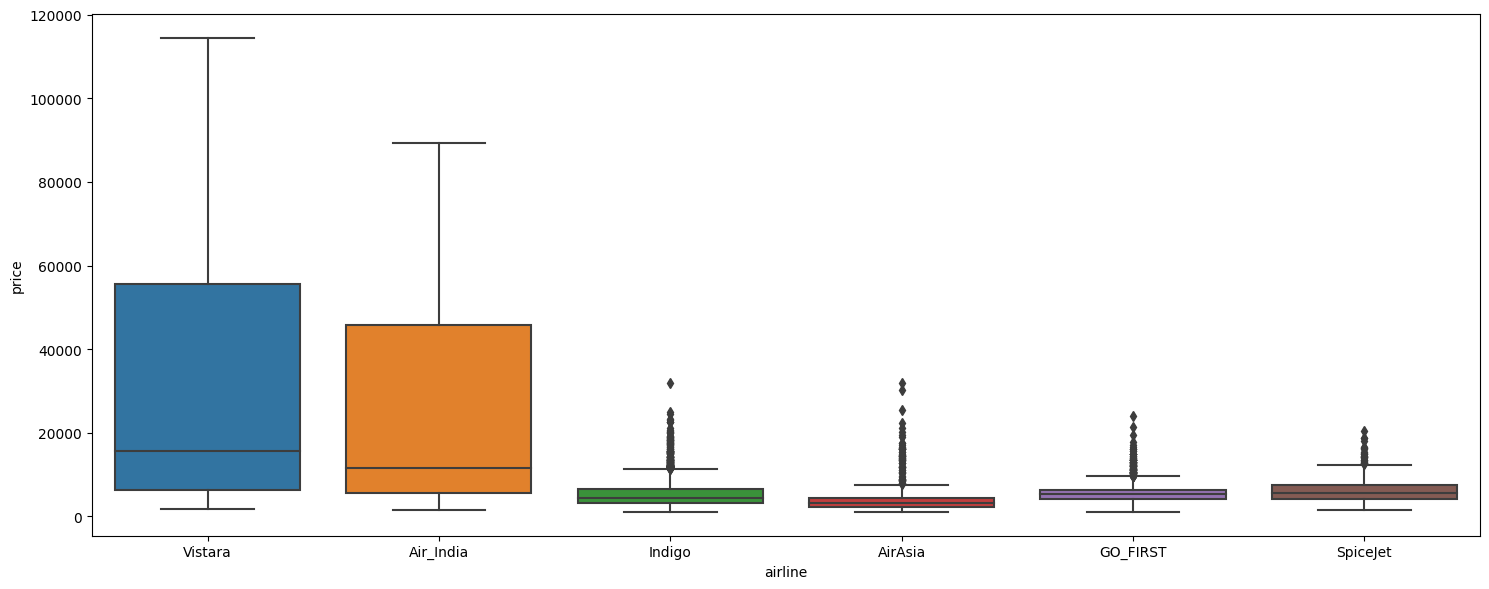

In [14]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x='airline',y='price',data = df.sort_values('price' , ascending = False))
plt.tight_layout()
plt.show()

In [15]:
df.groupby('airline').describe()['price'].sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Vistara,8535.0,30473.743409,25674.398653,1714.0,6432.0,15615.0,55502.0,114523.0
Air_India,5371.0,23622.449637,21067.920802,1526.0,5602.0,11488.0,45883.0,89257.0
SpiceJet,606.0,6059.975248,2710.678372,1606.0,4149.0,5550.0,7410.0,20478.0
GO_FIRST,1508.0,5683.032493,2453.951960,1105.0,4205.0,5418.0,6395.0,24121.0
Indigo,2924.0,5339.213748,3302.163803,1105.0,3219.0,4453.0,6489.0,31952.0
AirAsia,1056.0,4149.467803,3175.006293,1105.0,2336.0,3161.0,4513.0,31799.0


In [16]:
Airline = pd.get_dummies(data = df['airline'] , drop_first = True)
df = pd.concat([df , Airline] , axis=1)
df['Air_India'] = df['Air_India'].replace({False:0 , True:1})
df['GO_FIRST'] = df['GO_FIRST'].replace({False:0 , True:1})
df['Indigo'] = df['Indigo'].replace({False:0 , True:1})
df['SpiceJet'] = df['SpiceJet'].replace({False:0 , True:1})
df['Vistara'] = df['Vistara'].replace({False:0 , True:1})
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,1,Vistara,UK-810,Bangalore,1,1,1,Mumbai,0,14.25,21,7212,0,0,0,0,1
1,2,SpiceJet,SG-5094,Hyderabad,4,0,1,Kolkata,0,1.75,7,5292,0,0,0,1,0
2,3,Vistara,UK-846,Bangalore,2,1,2,Delhi,1,9.58,5,60553,0,0,0,0,1
3,4,Vistara,UK-706,Kolkata,2,1,2,Hyderabad,0,6.75,28,5760,0,0,0,0,1
4,5,Indigo,6E-5394,Chennai,1,0,3,Mumbai,0,2.00,4,10712,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,1,5,Mumbai,0,7.92,45,3153,0,0,1,0,0
19996,19997,AirAsia,I5-582,Kolkata,2,1,4,Delhi,0,5.83,24,3911,0,0,0,0,0
19997,19998,Vistara,UK-832,Chennai,1,2,2,Bangalore,0,35.33,17,14822,0,0,0,0,1
19998,19999,Vistara,UK-996,Mumbai,4,1,3,Bangalore,0,16.33,21,6450,0,0,0,0,1


In [17]:
df.drop('airline' ,axis=1 , inplace = True)
df.head()

,id,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,1,UK-810,Bangalore,1,1,1,Mumbai,0,14.25,21,7212,0,0,0,0,1
1,2,SG-5094,Hyderabad,4,0,1,Kolkata,0,1.75,7,5292,0,0,0,1,0
2,3,UK-846,Bangalore,2,1,2,Delhi,1,9.58,5,60553,0,0,0,0,1
3,4,UK-706,Kolkata,2,1,2,Hyderabad,0,6.75,28,5760,0,0,0,0,1
4,5,6E-5394,Chennai,1,0,3,Mumbai,0,2.00,4,10712,0,0,1,0,0


In [18]:
# df["somecolumn"] = df["somecolumn"].astype(int)

In [19]:
list1 = ['source_city', 'destination_city']
for l in list1:
    print(df[[l]].value_counts())

source_city
Mumbai         4068
Delhi          4022
Bangalore      3486
Kolkata        3092
Hyderabad      2748
Chennai        2584
Name: count, dtype: int64
destination_city
Mumbai              3918
Delhi               3825
Bangalore           3425
Kolkata             3323
Hyderabad           2814
Chennai             2695
Name: count, dtype: int64


In [20]:
df = pd.get_dummies(data = df , columns = list1 , drop_first = True)
df.head()

,id,flight,departure_time,stops,arrival_time,class,duration,days_left,price,Air_India,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,UK-810,1,1,1,0,14.25,21,7212,0,...,False,False,False,False,False,False,False,False,False,True
1,2,SG-5094,4,0,1,0,1.75,7,5292,0,...,False,False,True,False,False,False,False,False,True,False
2,3,UK-846,2,1,2,1,9.58,5,60553,0,...,False,False,False,False,False,False,True,False,False,False
3,4,UK-706,2,1,2,0,6.75,28,5760,0,...,False,False,False,True,False,False,False,True,False,False
4,5,6E-5394,1,0,3,0,2.00,4,10712,0,...,True,False,False,False,False,False,False,False,False,True


In [21]:
df['source_city_Chennai'] = df['source_city_Chennai'].replace({False:0 , True:1})
df['source_city_Delhi'] = df['source_city_Delhi'].replace({False:0 , True:1})
df['source_city_Hyderabad'] = df['source_city_Hyderabad'].replace({False:0 , True:1})
df['source_city_Kolkata'] = df['source_city_Kolkata'].replace({False:0 , True:1})
df['source_city_Mumbai'] = df['source_city_Mumbai'].replace({False:0 , True:1})
df['destination_city_Chennai'] = df['destination_city_Chennai'].replace({False:0 , True:1})
df['destination_city_Delhi'] = df['destination_city_Delhi'].replace({False:0 , True:1})
df['destination_city_Hyderabad'] = df['destination_city_Hyderabad'].replace({False:0 , True:1})
df['destination_city_Kolkata'] = df['destination_city_Kolkata'].replace({False:0 , True:1})
df['destination_city_Mumbai'] = df['destination_city_Mumbai'].replace({False:0 , True:1})
df.head()

,id,flight,departure_time,stops,arrival_time,class,duration,days_left,price,Air_India,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,UK-810,1,1,1,0,14.25,21,7212,0,...,0,0,0,0,0,0,0,0,0,1
1,2,SG-5094,4,0,1,0,1.75,7,5292,0,...,0,0,1,0,0,0,0,0,1,0
2,3,UK-846,2,1,2,1,9.58,5,60553,0,...,0,0,0,0,0,0,1,0,0,0
3,4,UK-706,2,1,2,0,6.75,28,5760,0,...,0,0,0,1,0,0,0,1,0,0
4,5,6E-5394,1,0,3,0,2.00,4,10712,0,...,1,0,0,0,0,0,0,0,0,1


In [22]:
df.drop("flight" , axis=1 , inplace = True)
df_test.drop('flight',axis=1,inplace = True)

In [23]:
# flight['flight_1'] = flight['flight'].str.split('-').str[0]
# flight['flight_2'] = flight['flight'].str.split('-').str[1]
# flight['flight_3'] = flight['flight'].str.split('-').str[2]
# flight['flight_4'] = flight['flight'].str.split('-').str[3]
# flight['flight_5'] = flight['flight'].str.split('-').str[4]

# flight.head()

In [24]:
# flight.fillna('None' ,inplace = True)
# flight.head()

In [25]:
# from sklearn.preprocessing import LabelEncoder
# L_E = LabelEncoder()
# for i in range(1,6):
#     col = 'flight_' + str(i)
#     flight[col] = L_E.fit_transform(flight[col])
# flight.head()

In [26]:
# df = pd.concat([df ,flight] , axis=1)
# df.head()

In [27]:
# df.drop('flight' ,axis=1 ,inplace = True)
df.head()

,id,departure_time,stops,arrival_time,class,duration,days_left,price,Air_India,GO_FIRST,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,1,1,1,0,14.25,21,7212,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,4,0,1,0,1.75,7,5292,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,2,1,2,1,9.58,5,60553,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,2,1,2,0,6.75,28,5760,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,1,0,3,0,2.00,4,10712,0,0,...,1,0,0,0,0,0,0,0,0,1


This is a clean data
let's move on machine learning part

In [28]:
temp_col = df.columns.to_list()
print(temp_col , '\n')

new_col = temp_col[:7] + temp_col[8:]
new_col.append(temp_col[7])
print(new_col , '\n')

df = df.reindex(columns = new_col)
df.head()

['id', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left', 'price', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai', 'destination_city_Delhi', 'destination_city_Hyderabad', 'destination_city_Kolkata', 'destination_city_Mumbai'] 

['id', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai', 'destination_city_Delhi', 'destination_city_Hyderabad', 'destination_city_Kolkata', 'destination_city_Mumbai', 'price'] 



,id,departure_time,stops,arrival_time,class,duration,days_left,Air_India,GO_FIRST,Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,price
0,1,1,1,1,0,14.25,21,0,0,0,...,0,0,0,0,0,0,0,0,1,7212
1,2,4,0,1,0,1.75,7,0,0,0,...,0,1,0,0,0,0,0,1,0,5292
2,3,2,1,2,1,9.58,5,0,0,0,...,0,0,0,0,0,1,0,0,0,60553
3,4,2,1,2,0,6.75,28,0,0,0,...,0,0,1,0,0,0,1,0,0,5760
4,5,1,0,3,0,2.00,4,0,0,1,...,0,0,0,0,0,0,0,0,1,10712


In [29]:
from sklearn.model_selection import train_test_split as tts
train_set , test_set = tts(df , test_size = 0.002 , random_state = 36)

x = train_set.drop("price" , axis=1)
y = train_set["price"].copy()



In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df[0]

array([-1.73196421, -1.32104293,  0.19281382, -1.05817349, -0.67396452,
        0.28952803, -0.36141789, -0.60592693, -0.28556747, -0.41380488,
       -0.17676758,  1.15900489, -0.38518738, -0.50171816, -0.39910635,
       -0.42763537, -0.50530701, -0.39463317, -0.48628803, -0.40464543,
       -0.44638152,  2.02599241, -0.60365963])

In [49]:
from sklearn.ensemble import RandomForestRegressor
RM = RandomForestRegressor()
RM.fit(x ,y)

RandomForestRegressor()

In [82]:
test_data = x.sample(5000)
test_data

,id,departure_time,stops,arrival_time,class,duration,days_left,Air_India,GO_FIRST,Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
2179,2180,5,1,3,1,14.92,17,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17893,17894,1,0,3,0,2.00,2,0,0,1,...,0,0,0,0,1,1,0,0,0,0
7800,7801,2,1,2,1,9.17,25,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8888,8889,3,1,1,0,9.33,36,0,0,0,...,0,0,1,0,0,1,0,0,0,0
228,229,4,0,2,1,2.83,48,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580,11581,4,1,3,0,15.33,34,1,0,0,...,0,1,0,0,0,0,0,0,0,1
370,371,2,1,2,0,7.00,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0
13683,13684,1,1,4,0,9.25,36,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9617,9618,2,1,5,0,22.33,23,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [83]:
label = y.loc[test_data.index]
label

2179     56476
17893    15708
7800     49725
8888      4359
228      27792
         ...  
11580     3831
370      17641
13683     6109
9617      3988
14881     4697
Name: price, Length: 5000, dtype: int64

In [84]:
y_pred = RM.predict(test_data)
y_pred

array([56709.51, 11778.91, 49725.  , ...,  6301.45,  4007.97,  5099.61])

In [85]:
pd.DataFrame({'prediction':y_pred , 'Real value':label})

,prediction,Real value
2179,56709.51,56476
17893,11778.91,15708
7800,49725.00,49725
8888,5017.66,4359
228,28267.66,27792
...,...,...
11580,4481.72,3831
370,16762.63,17641
13683,6301.45,6109
9617,4007.97,3988


In [86]:
y_test = test_set['price'].copy()
y_test
print(len(y_test))
print(len(y_pred))

40
5000


In [61]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

37884.448967065066


Bu yaxshi natija

In [69]:
sample_solution.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [63]:
! pip install joblib

In [67]:
import joblib

filename = 'RM.jbl'
joblib.dump(RM, filename)

['RM.jbl']

In [78]:
df_test.head()

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,Kolkata,4,1,1,Delhi,1,28.25,2
1,2,Vistara,Delhi,1,1,1,Mumbai,1,13.83,34
2,3,Air_India,Mumbai,1,0,5,Chennai,1,2.00,30
3,4,AirAsia,Hyderabad,5,1,6,Delhi,0,5.17,26
4,5,Air_India,Kolkata,5,1,4,Mumbai,0,16.33,35


In [113]:
stops = {'one' : 1 , 'zero' : 0 , 'two_or_more':2}
classes = {'Economy':0 , 'Business':1}
df_test['stops'] = df_test['stops'].replace(stops)
df_test['class'] = df_test['class'].replace(classes)
departure_time  = {'Early_Morning':1 , 'Morning':2 ,'Afternoon':3,'Evening':4 ,'Night':5 , 'Late_Night':6}
df_test['departure_time'] = df_test['departure_time'].replace(departure_time)
arrival_time = {'Early_Morning':5 , 'Morning':3 ,'Afternoon':4 ,'Evening':2,'Night':1 , 'Late_Night':6}
df_test['arrival_time'] = df_test['arrival_time'].replace(arrival_time)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   int64  
 4   stops             5000 non-null   int64  
 5   arrival_time      5000 non-null   int64  
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   int64  
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 390.8+ KB


Below

there is easy way to clean data
you can use this way 
but i will try to clean dataset in my hand

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler 


num_pipeline = Pipeline([ ('std_scaler', StandardScaler()) ])
num_class = list(df_test[["departure_time","stops","arrival_time","class" ,"duration","days_left"]])
cat_class = ['airline','source_city','destination_city']
full_pipeline = ColumnTransformer([ ('num_objects',num_pipeline , num_class), ("cat_objects",OneHotEncoder(),cat_class) ])

In [116]:
df_test.head()

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,Kolkata,4,1,1,Delhi,1,28.25,2
1,2,Vistara,Delhi,1,1,1,Mumbai,1,13.83,34
2,3,Air_India,Mumbai,1,0,5,Chennai,1,2.00,30
3,4,AirAsia,Hyderabad,5,1,6,Delhi,0,5.17,26
4,5,Air_India,Kolkata,5,1,4,Mumbai,0,16.33,35


In [80]:
sample_solution.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [87]:
sample_solution['price'] = y_pred

In [88]:
sample_solution.head()

,id,price
0,1,56709.51
1,2,11778.91
2,3,49725.00
3,4,5017.66
4,5,28267.66


In [106]:
sample_solution.to_csv("submission_07.csv")

In [107]:
sub = pd.read_csv(r"C:\Users\hp\submission_07.csv")

In [110]:
sub

,id,price
0,1,56709.51
1,2,11778.91
2,3,49725.00
3,4,5017.66
4,5,28267.66
...,...,...
4995,4996,4481.72
4996,4997,16762.63
4997,4998,6301.45
4998,4999,4007.97


In [111]:
sub.to_csv("submission_7.csv")

In [112]:
sub1 = pd.read_csv(r"C:\Users\hp\submission_7.csv" , index_col = 0)
sub1

,id,price
0,1,56709.51
1,2,11778.91
2,3,49725.00
3,4,5017.66
4,5,28267.66
...,...,...
4995,4996,4481.72
4996,4997,16762.63
4997,4998,6301.45
4998,4999,4007.97
